<a href="https://colab.research.google.com/github/Untick/Marketplaces/blob/main/Shishkin%20Sergey/Keras_structured_data_regression_%D0%98%D0%BD%D0%B3%D0%B5%D0%B9%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рекрессия на AutoKERAS

In [1]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 47.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: te

In [2]:
# Иморт необходимых библиотек
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import autokeras as ak
import math

Using TensorFlow backend


In [3]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
#Загружаем предобработанную базу для ускорения процесса (данную базу я создал в предыдущем ноутбуке из Озон Аналитика Графики по Фарам)
df = pd.read_csv('/content/gdrive/MyDrive/my_df_1d.csv')
print(df.shape)
df.head(10)

(362, 12)


,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,"В корзину, всего",Заказано на сумму,Заказано товаров,Позиция в поиске и каталоге средняя,Цена товара средняя,Контент-рейтинг средний
0,2022-06-01,615,44,1059,86,458,18,24500,6,66.584214,4083.333333,24.583333
1,2022-06-02,696,38,1026,47,521,14,14850,5,395.898541,2970.000000,26.500000
2,2022-06-03,242,21,430,35,221,10,6990,3,204.134389,2330.000000,28.333333
3,2022-06-04,55,6,90,7,51,6,6500,2,24.550588,3250.000000,23.750000
4,2022-06-06,528,58,870,97,428,9,26500,5,135.509322,5300.000000,24.000000
5,2022-06-07,138,13,261,32,115,8,9000,2,145.876348,4500.000000,23.750000
6,2022-06-08,312,15,418,18,263,3,9500,3,170.842814,3166.666667,28.333333
7,2022-06-09,342,9,553,14,263,0,13000,3,66.680342,4333.333333,26.666667
8,2022-06-10,105,6,173,9,95,6,8990,3,64.863053,2996.666667,20.000000
9,2022-06-11,284,26,489,35,201,8,17700,5,79.196020,3540.000000,32.000000


In [9]:
# Удаляем лишние колонки
df.drop(['День', 'В корзину, всего', 'Заказано на сумму'], axis=1, inplace=True)
df.head()

,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Заказано товаров,Позиция в поиске и каталоге средняя,Цена товара средняя,Контент-рейтинг средний
0,615,44,1059,86,458,6,66.584214,4083.333333,24.583333
1,696,38,1026,47,521,5,395.898541,2970.000000,26.500000
2,242,21,430,35,221,3,204.134389,2330.000000,28.333333
3,55,6,90,7,51,2,24.550588,3250.000000,23.750000
4,528,58,870,97,428,5,135.509322,5300.000000,24.000000


In [10]:
# Формируем тренировочную и тестовую выборки
train_size = int(df.shape[0] * 0.9)
df[:train_size].to_csv("train.csv", index=False)
df[train_size:].to_csv("eval.csv", index=False)
train_file_path = "train.csv"
test_file_path = "eval.csv"

In [11]:
# Настраиваем регрессор
reg = ak.StructuredDataRegressor(
    overwrite=True, # перезаписываем параметры модели
    max_trials=35,  # указываем количество моделей которые будет тестировать Керас
    #metrics=["mae"], можно задать метрику по которой будудет отбираться лучшая модель
)
# указываем данные на которых будут учиться модели
reg.fit(
    train_file_path, #Путь к файлу train.csv
    "Заказано товаров", # # Имя столбца с целевыми значениями
    epochs=90, # количество эпох на которых будет обучаться каждая модель
)

predicted_y = reg.predict(test_file_path) # тестирование лучшей модели на тестовой выборке

print(reg.evaluate(test_file_path, "Заказано товаров")) # вывод метрики на тестовой выборке

Trial 35 Complete [00h 00m 11s]
val_loss: 22.8485050201416

Best val_loss So Far: 16.683147430419922
Total elapsed time: 00h 05m 03s
Epoch 1/90
11/11 [==============================] - 0s 2ms/step - loss: 158.3123 - mean_squared_error: 158.3123
Epoch 2/90
11/11 [==============================] - 0s 2ms/step - loss: 141.9704 - mean_squared_error: 141.9704
Epoch 3/90
11/11 [==============================] - 0s 2ms/step - loss: 113.8046 - mean_squared_error: 113.8046
Epoch 4/90
11/11 [==============================] - 0s 2ms/step - loss: 52.4520 - mean_squared_error: 52.4520
Epoch 5/90
11/11 [==============================] - 0s 2ms/step - loss: 33.0080 - mean_squared_error: 33.0080
Epoch 6/90
11/11 [==============================] - 0s 2ms/step - loss: 35.9879 - mean_squared_error: 35.9879
Epoch 7/90
11/11 [==============================] - 0s 2ms/step - loss: 27.3868 - mean_squared_error: 27.3868
Epoch 8/90
11/11 [==============================] - 0s 2ms/step - loss: 25.1635 - mean_squa

In [12]:
# Получение лучшей модели, сохранение модели и вывод структуры модели
model = reg.export_model()
model.save('model.keras')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 multi_category_encoding (M  (None, 8)                 0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 re_lu (ReLU)                (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544   

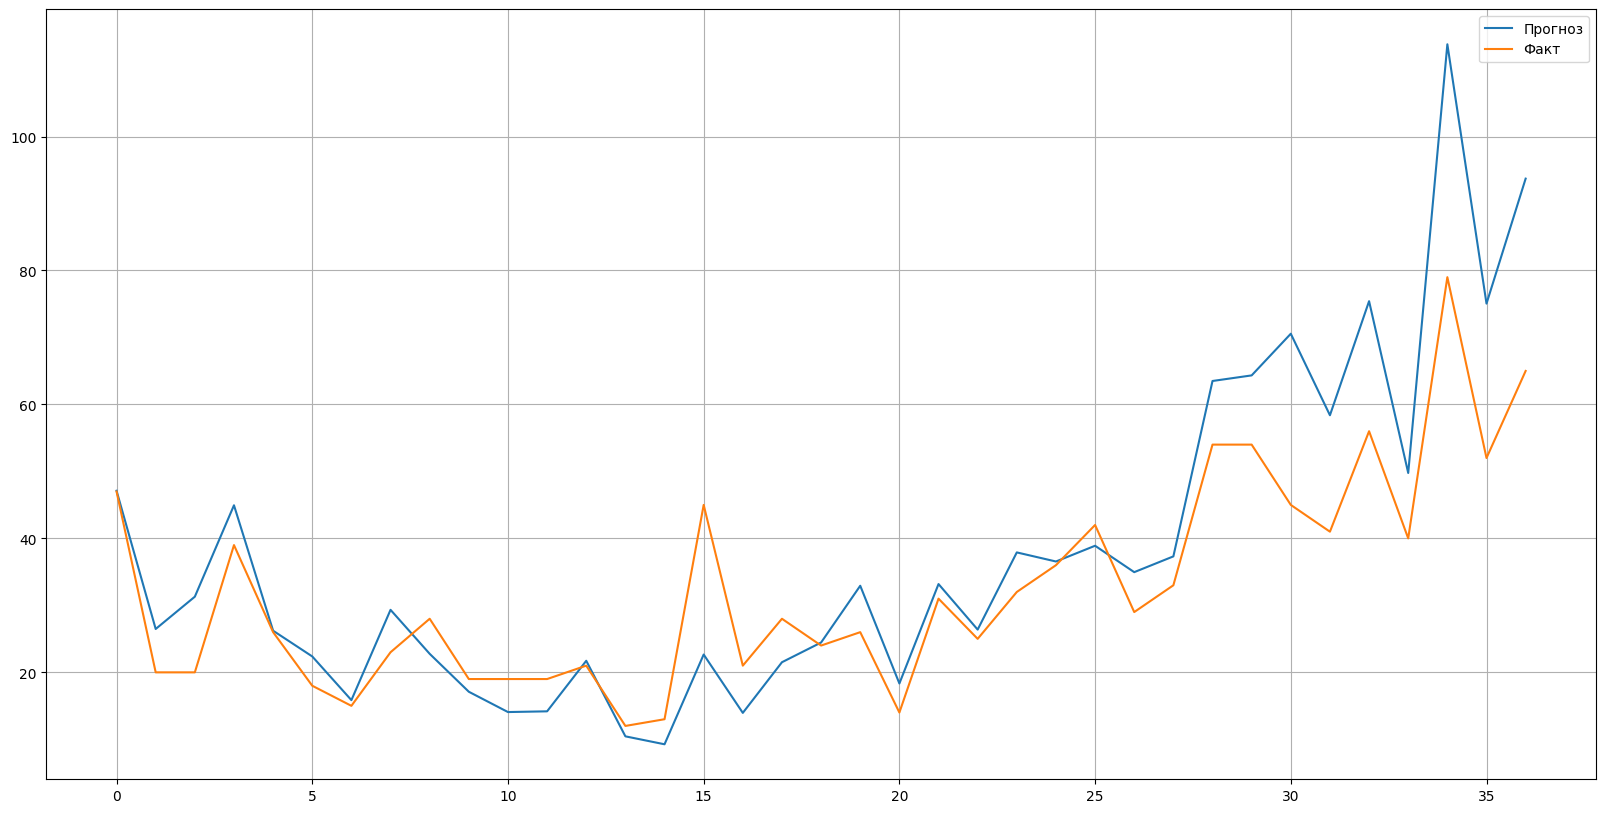

In [13]:
# строим график Факт и Прогноз для наглядности
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(predicted_y)), predicted_y, label='Прогноз')
plt.plot(np.arange(len(predicted_y)), df[train_size:]['Заказано товаров'].values, label='Факт')
plt.legend()
plt.grid()
plt.show()

На данном примере можно тестировать предсказание целевого показателя от различного количества данных изменяя входные данные. При не достаточной точности можно дорабатывать структуру или параметры модели.